#### Introduction.

Solving MNIST has been labeled the "Hello World" of deep learning..... 

Firstly we import the libraries. 


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from keras import models, layers
from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator

np.random.seed(2104)

 Data Processing and Exploration



In [2]:
#Load the data 
train =  pd.read_csv('train_2.csv')
test  = pd.read_csv('test_2.csv')

In [3]:
train.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train.isnull().describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000,42000,42000,42000,42000,42000,42000,42000,42000,42000,...,42000,42000,42000,42000,42000,42000,42000,42000,42000,42000
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,42000,42000,42000,42000,42000,42000,42000,42000,42000,42000,...,42000,42000,42000,42000,42000,42000,42000,42000,42000,42000


In [10]:
train.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

In [8]:
test.isnull().describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000,28000,28000,28000,28000,28000,28000,28000,28000,28000,...,28000,28000,28000,28000,28000,28000,28000,28000,28000,28000
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,28000,28000,28000,28000,28000,28000,28000,28000,28000,28000,...,28000,28000,28000,28000,28000,28000,28000,28000,28000,28000


In [11]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [4]:
Y_train = train['label']
X_train = train.drop('label', axis=1)
X_train.shape
X_train.head(3)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
Y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [16]:
 sum(Y_train.value_counts())

42000

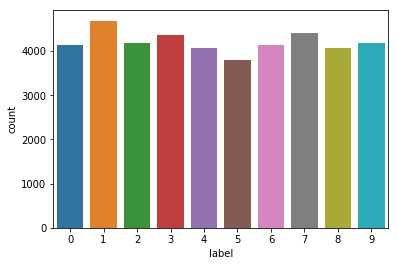

In [17]:
import seaborn as sb
sb.countplot(Y_train)

In [5]:
# Normalizing and reshaping the data 

X_train = X_train / 255.0
test = test / 255.0
X_train = X_train.values.reshape(X_train.shape[0],28,28,1)
test = test.values.reshape(test.shape[0],28,28,1)


In [6]:
# Encode labels to one hot vectors
Y_train = to_categorical(Y_train, num_classes = 10)

In [7]:
#Split the train and the validation set for the fitting
random_seed = 2104
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=random_seed)

 We are going to do 10-way classification, so we use a final layer with 10 outputs and a softmax activation. Now here's what our network looks like:


In [8]:
from keras import regularizers

model = models.Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))


# Data Augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)


We are going to do 10-way classification, so we use a final layer with 10 outputs and a softmax activation. Now here's what our network looks like:


In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
__________

In [10]:
# Define the optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
# Compile model
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# Set a learning rate annealer
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [12]:
# Fit the model
batch_size = 86
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=86),
                              epochs = 30, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/30
 - 471s - loss: 0.3977 - acc: 0.8728 - val_loss: 0.0596 - val_acc: 0.9814
Epoch 2/30
 - 491s - loss: 0.1317 - acc: 0.9606 - val_loss: 0.0432 - val_acc: 0.9860
Epoch 3/30
 - 504s - loss: 0.0911 - acc: 0.9727 - val_loss: 0.0660 - val_acc: 0.9836
Epoch 4/30
 - 520s - loss: 0.0811 - acc: 0.9764 - val_loss: 0.0453 - val_acc: 0.9864
Epoch 5/30
 - 521s - loss: 0.0693 - acc: 0.9793 - val_loss: 0.0327 - val_acc: 0.9905
Epoch 6/30
 - 528s - loss: 0.0655 - acc: 0.9820 - val_loss: 0.0416 - val_acc: 0.9871
Epoch 7/30
 - 535s - loss: 0.0603 - acc: 0.9828 - val_loss: 0.0334 - val_acc: 0.9907
Epoch 8/30
 - 540s - loss: 0.0613 - acc: 0.9821 - val_loss: 0.0301 - val_acc: 0.9921
Epoch 9/30
 - 532s - loss: 0.0586 - acc: 0.9839 - val_loss: 0.0352 - val_acc: 0.9893
Epoch 10/30
 - 533s - loss: 0.0606 - acc: 0.9830 - val_loss: 0.0325 - val_acc: 0.9902
Epoch 11/30
 - 552s - loss: 0.0571 - acc: 0.9834 - val_loss: 0.0434 - val_acc: 0.9883
Epoch 12/30
 - 568s - loss: 0.0593 - acc: 0.9836 - val_loss: 0.

dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])


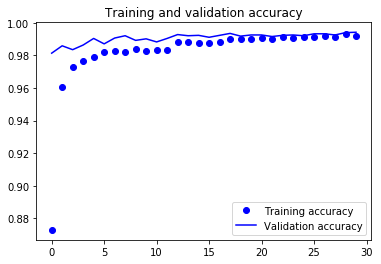

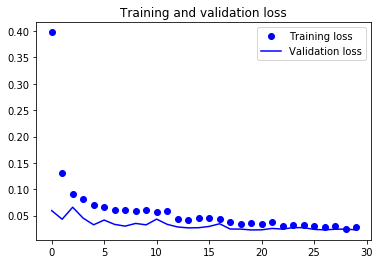

In [13]:
# Plot the loss and accuracy curves for training and validation 
print(history.history.keys())
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [14]:
# predict results
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_keras.csv",index=False)

In [15]:
model.save('cnn_keras_mnist')

In [16]:
history.history['val_acc']

[0.98142856257302424,
 0.98595237425395421,
 0.98357142195815128,
 0.98642856495720999,
 0.99047618593488418,
 0.98714285101209365,
 0.99071428128651207,
 0.9921428533962795,
 0.98928570917674474,
 0.99023809058325629,
 0.98833332777023319,
 0.99047618593488418,
 0.99285713945116316,
 0.9921428533962795,
 0.99238094874790739,
 0.99119047198976784,
 0.99238094874790739,
 0.99357142550604682,
 0.99190475804465161,
 0.99261904409953527,
 0.99261904409953527,
 0.99166666269302373,
 0.99238094874790739,
 0.99261904409953527,
 0.9921428533962795,
 0.99333333015441894,
 0.99333333015441894,
 0.99261904409953527,
 0.9940476162093026,
 0.99428571156093049]